In [2]:
import numpy as np
from matplotlib import pyplot as plt

Some parameters about the BW model

Max-Freq = 65 Hz
Max-Vel = 5000 m/s 
Min-Vel = 250 m/s

if we choose and element size of about 3 m then we should resolve frequency of up to 65 Hz

pad-h = 20

Line bounds = [0-20, ~200+20] = [-20, 20]

Min-Depth = 90

Ne-x = ciel(240/3) = 80
Ne-z = ciel(90/3) = 30

Paramets we need to set when writing the Par_file

    SIMULATION_TYPE = 1

    SAVE_FORWARD = .true.

    NSTEP = 10 (a small number)

    MODEL = default

    SAVE_MODEL = binary

    UNDO_ATTENUATION_AND_OR_PML = .true. 

    use_existing_STATIONS = .true.


array([[-2.00000000e+01,  2.46877002e+03],
       [ 0.00000000e+00,  2.46877002e+03],
       [ 4.96941115e-01,  2.46880005e+03],
       [ 9.93886895e-01,  2.46883008e+03],
       [ 1.49082801e+00,  2.46890991e+03],
       [ 1.98776912e+00,  2.46897998e+03],
       [ 2.48471024e+00,  2.46907007e+03],
       [ 2.98165602e+00,  2.46919995e+03],
       [ 3.47859714e+00,  2.46933008e+03],
       [ 3.97553825e+00,  2.46947998e+03],
       [ 4.47248403e+00,  2.46958008e+03],
       [ 4.96942515e+00,  2.46961011e+03],
       [ 5.46636626e+00,  2.46963989e+03],
       [ 5.96331204e+00,  2.46965991e+03],
       [ 6.46025316e+00,  2.46970996e+03],
       [ 6.95719427e+00,  2.46976001e+03],
       [ 7.45413539e+00,  2.46982007e+03],
       [ 7.95108117e+00,  2.46986011e+03],
       [ 8.44802228e+00,  2.46989990e+03],
       [ 8.94496340e+00,  2.46994995e+03],
       [ 9.44190918e+00,  2.46998999e+03],
       [ 9.93885029e+00,  2.47004004e+03],
       [ 1.04357914e+01,  2.47007007e+03],
       [ 1.

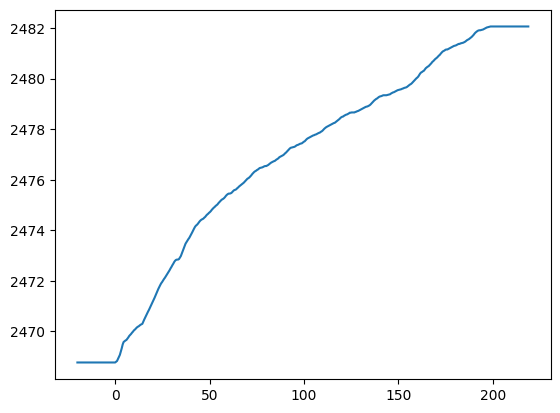

In [4]:
# Write interfaces file

h: float = 3.0
pad_h: float = 20.0
Nez: int = 30

topo = np.loadtxt('Field-Data/topo.txt')

min_elev: float = np.mean(topo[:,1]) - Nez*h

pad_l = np.array([min(topo[:,0]) - pad_h, topo[0,1]])
pad_r = np.array([max(topo[:,0]) + pad_h, topo[-1,1]])

topo = np.vstack((pad_l, topo, pad_r))

plt.plot(topo[:,0], topo[:,1])

with open('interfaces.dat', 'w') as fid:
    fid.write("# number of interfaces\n")
    fid.write(f"{2}\n")
    fid.write("# interface number 1 (bottom of mesh) \n")
    fid.write(f"{2}\n")
    fid.write(f"{topo[0,0]}" + 4*" " + f"{min_elev}\n")
    fid.write(f"{topo[-1,0]}" + 4*" " + f"{min_elev}\n")
    fid.write("# interface number 2 (top of mesh) \n")
    fid.write(f"{len(topo)}\n")
    for i in range(len(topo)):
        fid.write(f"{topo[i,0]}" + 4*" " + f"{topo[i,1]}\n")
    fid.write("# Number of elements in this layer \n")
    fid.write(f"{Nez}")
topo